## It's clear from previous notebooks that some of the strongest features are those that aren't upgradeable, such as those relating to Year, Square-Footage, Size/Capacity, and certain Neighborhoods.

### But I want to find those features, that, if I were to buy house, which ones result in the best ROI for me by upgrading them.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/cleaned.csv')

In [3]:
df = pd.get_dummies(df, columns=list(df.select_dtypes(exclude=['int64','float64']).columns))
all_cols = df.drop(['SalePrice','SalePrice_deskewed','Unnamed: 0', 'Id', 'PID'], 1).columns

In [4]:
X = df[all_cols]
y = df['SalePrice_deskewed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**I'm choosing values under `.017` because everything with a higher value relates to un-upgradeable features.**

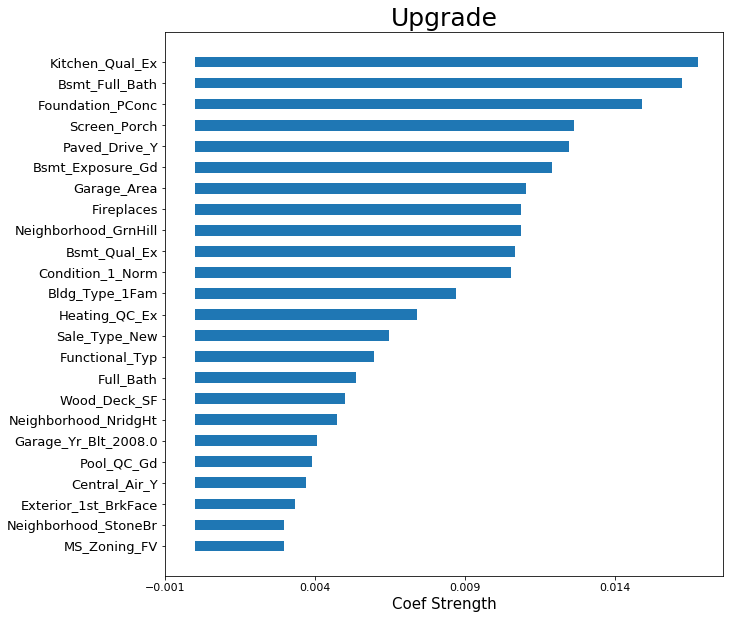

In [80]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train,y_train)
X_test_ss = ss.transform(X_test)

encv = ElasticNetCV(cv=11,l1_ratio=.65)
encv.fit(X_train_ss,y_train)

encv_coefs = pd.DataFrame({'Var':all_cols,
                           "Coef":encv.coef_})

a = encv_coefs[(encv_coefs['Coef'] > .0029) & (encv_coefs['Coef'] < .017)].sort_values('Coef')['Coef']
b = encv_coefs[(encv_coefs['Coef'] > .0029) & (encv_coefs['Coef'] < .017)].sort_values('Coef')['Var']

N = len(a)
ind = np.arange(N)
width= .5

plt.barh(ind, a, width)

plt.xlabel('Coef Strength',fontsize=15)
plt.title('Upgrade',fontsize=25)
plt.yticks(ind, b,fontsize=13)

plt.xticks(np.arange(-.001, .016, .005),fontsize=11)

a = plt.gcf()
a.set_size_inches(10, 10)

plt.show()

Even within this chart, I want to ignore those based on location and area. 

These are the 9 values that are upgradeable and have the highest impact:

- Exterior_1st_BrkFace
- Central_Air_Y
- Heating_QC_Ex
- Bsmt_Qual_Ex
- Bsmt_Exposure_Gd
- Paved_Drive_Y]
- Foundation_PConc
- Bsmt_Full_Bath
- Kitchen_Qual_Ex

In [81]:
upgradeable = ['Exterior_1st_BrkFace','Central_Air_Y','Heating_QC_Ex','Bsmt_Qual_Ex',
               'Bsmt_Exposure_Gd','Paved_Drive_Y','Foundation_PConc','Bsmt_Full_Bath','Kitchen_Qual_Ex']

**There are their weights respectively.**

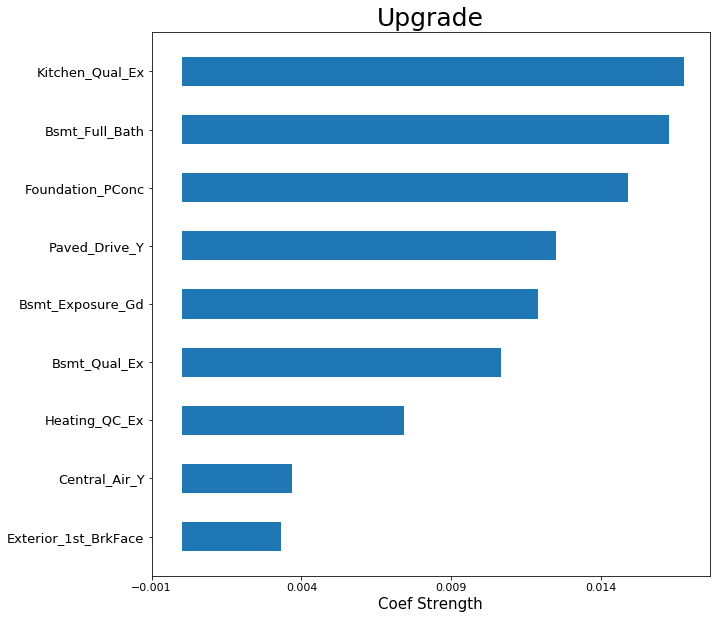

In [90]:
a = encv_coefs[encv_coefs['Var'].isin(upgradeable)].sort_values('Coef')['Coef']

N = len(a)
ind = np.arange(N)
width= .5

plt.barh(ind, a, width)

plt.xlabel('Coef Strength',fontsize=15)
plt.title('Upgrade',fontsize=25)
plt.yticks(ind, upgradeable,fontsize=13)

plt.xticks(np.arange(-.001, .016, .005),fontsize=11)

a = plt.gcf()
a.set_size_inches(10, 10)

plt.show()

In [7]:
def make_scatter_plots(cols):
    f,axes = plt.subplots(3,3,figsize=(15,15))
    for ax,var in zip(axes.flatten(),cols):
        ax.set_title(var + " vs. Price", fontsize=13)
        ax.set_xlabel("SalePrice", fontsize=9)
        ax.set_ylabel(var, fontsize=17)
        ax.scatter(df["SalePrice_deskewed"],df[var])
    plt.tight_layout()

In [8]:
def make_box_plots_sns(cols):
    f,axes = plt.subplots(3,3,figsize=(30,15))
    for ax,var in zip(axes.flatten(),cols):
        my_list = df[var].unique()
        for x in my_list:
            price_vals = df.loc[df[var] == x]['SalePrice_deskewed']
            ax.set_title("Price Variation for "+str(var), fontsize=13)
            sns.boxplot(price_vals,ax=ax,hue=x)
    plt.tight_layout()

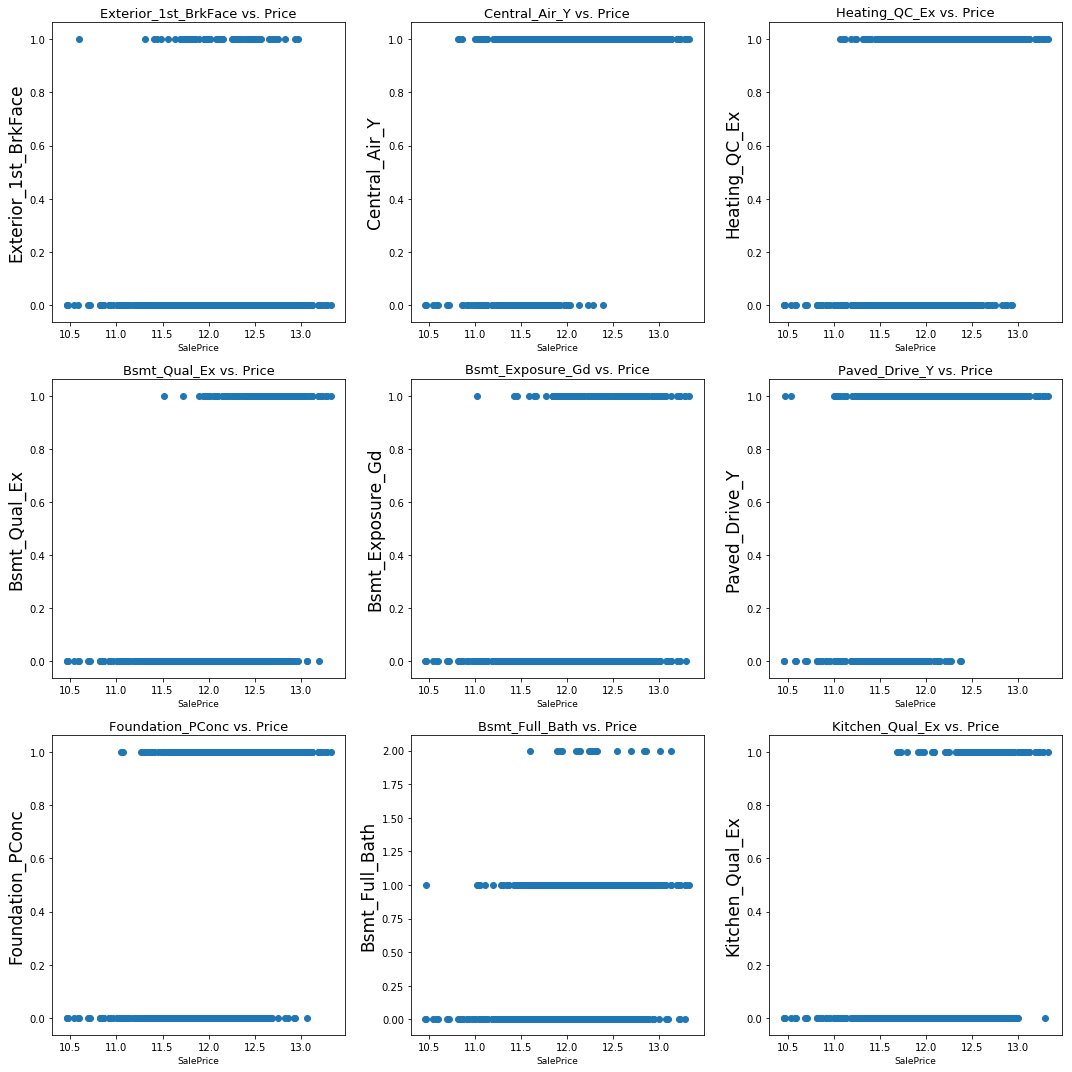

In [9]:
make_scatter_plots(upgradeable)

**This scatter plot allows me to see where and how I should upgrade. For example, if I were to buy a house that didn't have a paved driveway, I know that I should pave it. Since the categorical variables here are the result of being dummied, that thought seems almost immediate, but looking at `Bsmt_Qual` gives me insight into how much and how important an upgrade is.**

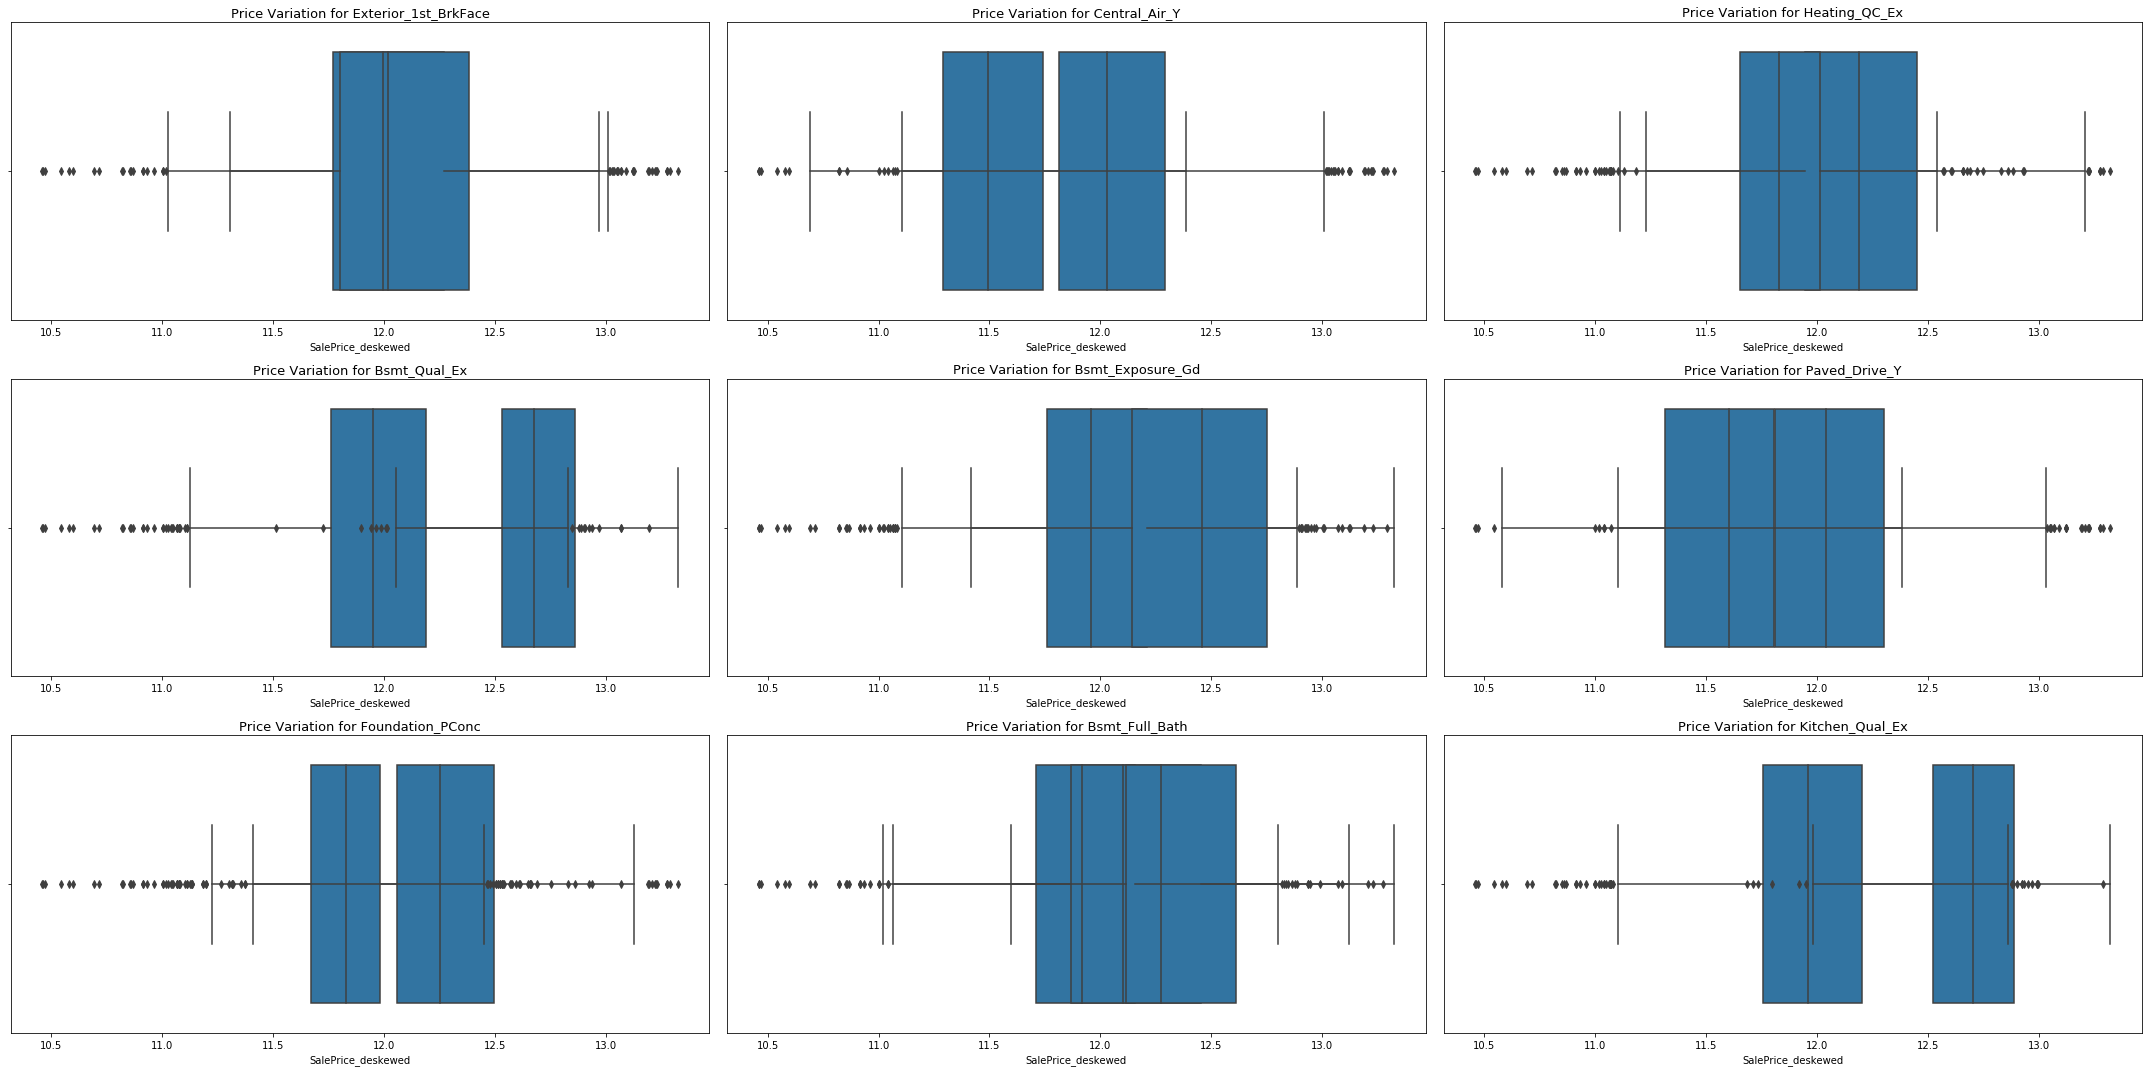

In [10]:
make_box_plots_sns(upgradeable)

**For each of the upgradeable features, I want to see how the values for that highly impactful feature in respect to the variation of those features.**

*Note*: Graphing this in a subplot (code commented out below) doesn't allow me to show the variations in the features. However, I've still opted to show them together. This has it's pro's and con's, but I think this is best, since the variations in the feature can be easily found (and many are in my presentation).

In [169]:
def make_bar_plots(cols):
    f,axes = plt.subplots(3,3,figsize=(20,20))
    for ax,x in zip(axes.flatten(),cols):
        values = encv_coefs[encv_coefs['Var'].str.contains(x)]

        N = len(values)
        ind = np.arange(N)
        width= .5

        ax.barh(ind, np.expm1(values['Coef']), width)

        ax.set_xlabel('Coef Strength',fontsize=15)
        ax.set_title(x+"'s Weight",fontsize=25)
        ax.set_yticks(ind, str(values['Var']))

    plt.show()

In [ ]:
# def make_bar_plots(string):
#     values = encv_coefs[encv_coefs['Var'].str.contains(string)]
    
#     N = len(values)
#     ind = np.arange(N)
#     width= .5

#     plt.barh(ind, np.expm1(values['Coef']), width)

#     plt.xlabel('Coef Strength',fontsize=15)
#     plt.title(string+"'s Weight",fontsize=25)
#     plt.yticks(ind, values['Var'],fontsize=13)

#     a = plt.gcf()
#     a.set_size_inches(5, 5)

#     plt.show()

# def bar_plot_builder(cols):
#     for x in cols:
#         make_bar_plots(x)

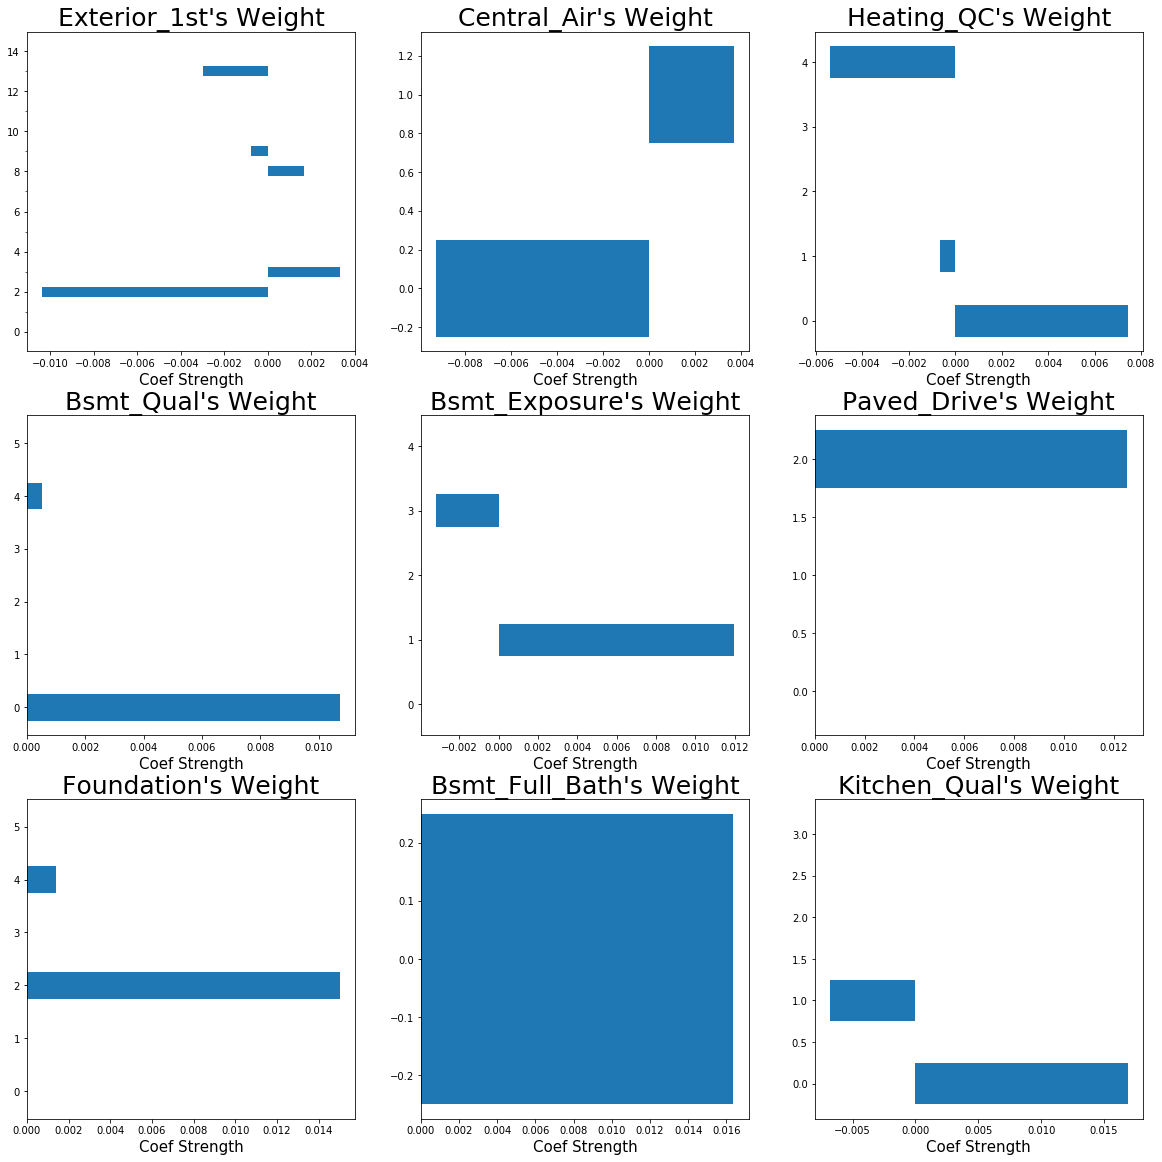

In [170]:
make_bar_plots(['Exterior_1st','Central_Air','Heating_QC','Bsmt_Qual','Bsmt_Exposure','Paved_Drive','Foundation','Bsmt_Full_Bath','Kitchen_Qual'])

## Under valued homes!

Below are the home prices that I tried to predict.

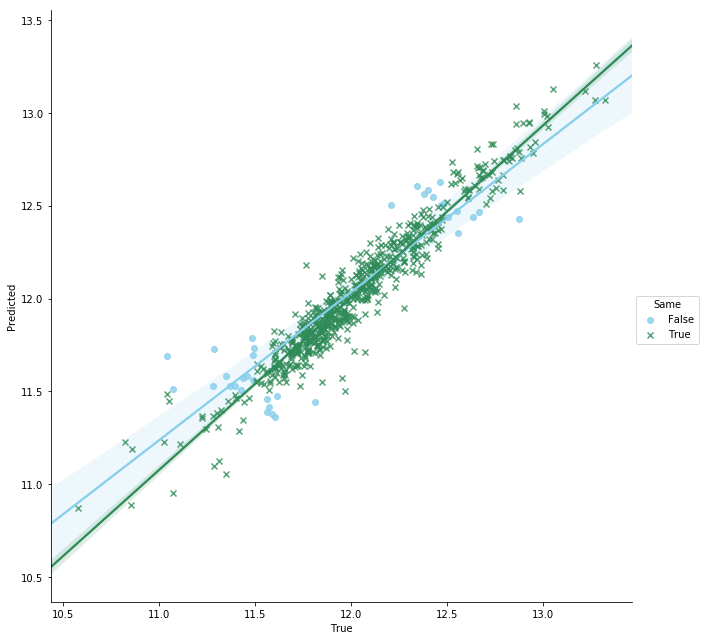

In [57]:
encv_predict_df = pd.DataFrame({'True':y_test,
                           'Predicted':encv.predict(X_test_ss),
                           'Same':(np.round(y_test,0) == np.round(encv.predict(X_test_ss),0)),
                           'Under':(np.round(y_test,0) > np.round(encv.predict(X_test_ss),0))
                            })

sns.lmplot(x='True',y='Predicted',data=encv_predict_df,size=9, aspect=1,hue='Same',
           markers=["o", "x"],palette={True:"seagreen", False:"skyblue"});

In [55]:
encv_predict_df['Same'].sum()/encv_predict_df['Same'].count()

0.9477611940298507

**That tells me that (after rounding), I'm 95% accurate.**

**Now I want to find which homes, based on my model, are undervalued.**

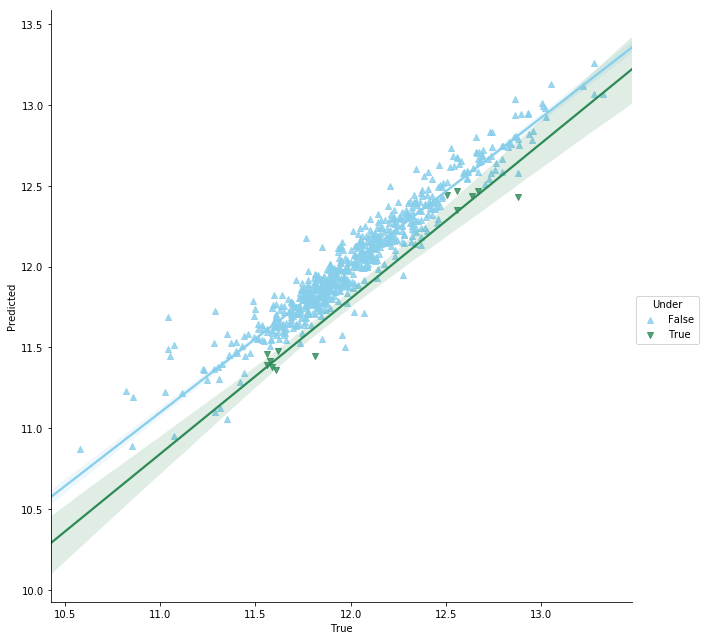

In [58]:
sns.lmplot(x='True',y='Predicted',data=encv_predict_df,size=9, aspect=1,hue='Under',
           markers=["^", "v"],palette={True:"seagreen", False:"skyblue"});

In [59]:
encv_predict_df['Under'].sum()/encv_predict_df['Same'].count()

0.019402985074626865

**In this small data set, 2% of homes are undervalued based on my algorithm. These would be the houses I want to focus on without question.**